In [9]:
!pip install python-igraph leidenalg --quiet

In [1]:
!pip install scanpy anndata scikit-learn

import scanpy as sc
import matplotlib.pyplot as plt

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


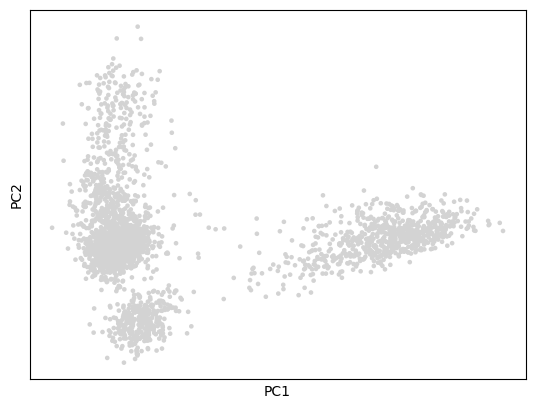

In [2]:
import scanpy as sc

# 1. Load example PBMC dataset
adata = sc.datasets.pbmc3k()  # ~3k PBMCs, classic tutorial dataset
print(adata)

# 2. Basic QC: filter low-quality cells and rare genes
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

# 3. Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4)

# 4. Log-transform the data
sc.pp.log1p(adata)

# 5. Identify highly variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

# 6. Scale the data
sc.pp.scale(adata, max_value=10)

# 7. Run PCA
sc.tl.pca(adata, svd_solver='arpack')

# 8. Plot PCA
sc.pl.pca(adata, color=None)

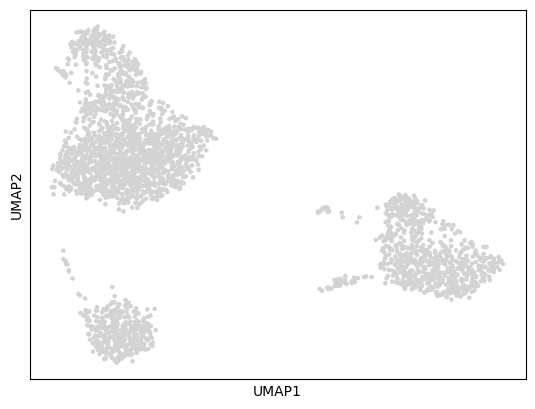

In [3]:
# Compute nearest neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Compute UMAP embedding
sc.tl.umap(adata)

# Plot UMAP
sc.pl.umap(adata)

/tmp/ipython-input-2880590111.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


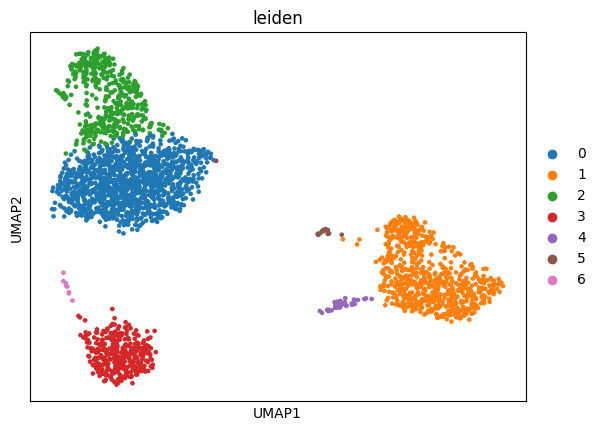

In [4]:
# Cluster the cells
sc.tl.leiden(adata, resolution=0.5)

# Plot UMAP colored by cluster
sc.pl.umap(adata, color=['leiden'])

In [6]:
# Check what cluster labels exist
adata.obs['leiden'].value_counts()

,count
leiden,
0,1212
1,653
2,430
3,348
4,36
5,13
6,8


In [8]:
markers = ['CD3D', 'MS4A1', 'NKG7', 'LYZ']
[g for g in markers if g in adata.var_names]

['MS4A1', 'NKG7']

In [9]:
adata.var_names[:50]

Index(['TNFRSF4', 'CPSF3L', 'ATAD3C', 'C1orf86', 'RER1', 'TNFRSF25', 'TNFRSF9',
       'CTNNBIP1', 'SRM', 'UBIAD1', 'DRAXIN', 'TNFRSF1B', 'PRDM2', 'DDI2',
       'SPEN', 'SDHB', 'CAPZB', 'CAMK2N1', 'CDA', 'C1QA', 'C1QC', 'C1QB',
       'ZNF436', 'MDS2', 'PITHD1', 'HMGCL', 'TMEM50A', 'LDLRAP1',
       'RP11-70P17.1', 'STMN1', 'PDIK1L', 'ZNF593', 'TMEM222', 'PPP1R8',
       'PTAFR', 'PHACTR4', 'SNHG12', 'TAF12', 'YTHDF2', 'PUM1', 'SPOCD1',
       'TMEM234', 'HDAC1', 'MARCKSL1', 'SMIM12', 'AGO4', 'TRAPPC3', 'EVA1B',
       'RRAGC', 'PPIE'],
      dtype='object', name='index')

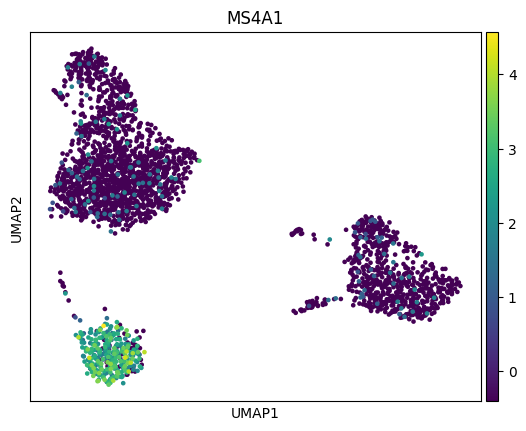

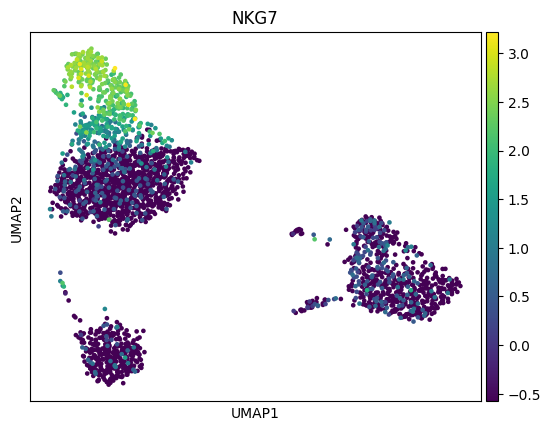

In [10]:


# B cell marker
sc.pl.umap(adata, color=['MS4A1'])

# NK cell marker
sc.pl.umap(adata, color=['NKG7'])


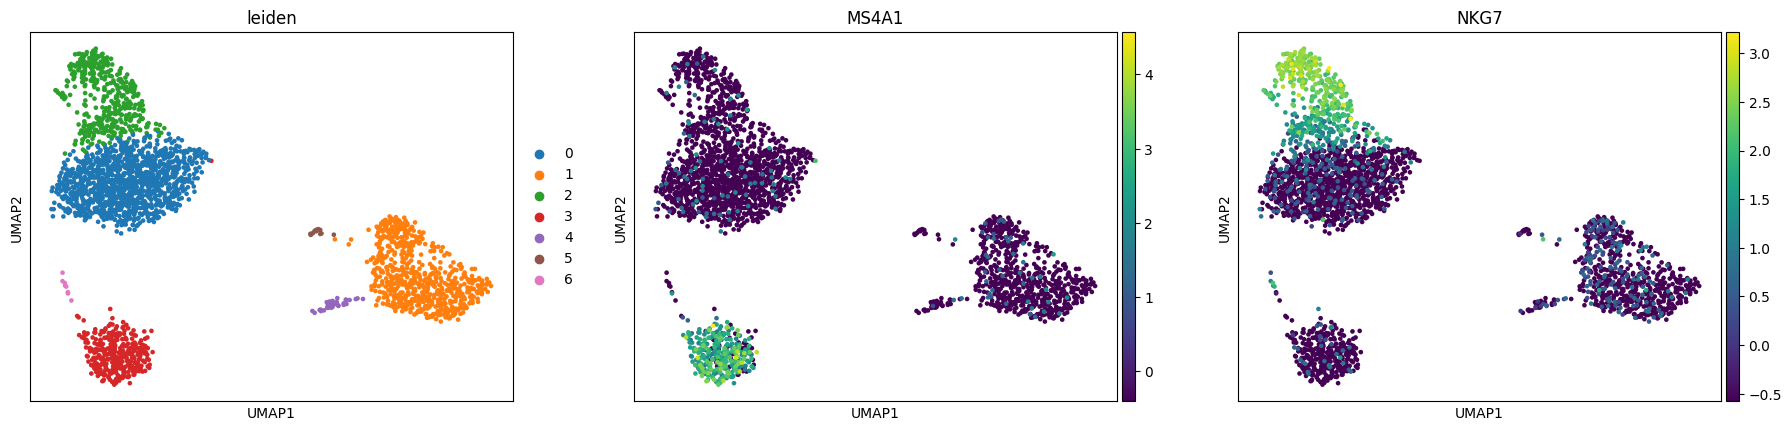

In [11]:
sc.pl.umap(adata, color=['leiden', 'MS4A1', 'NKG7'])